In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df=pd.read_csv('titanic train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

numerical columns:PassengerId,Age,Fare
categorical columns:Survived,Pclass,Sex,SibSp,Parch,Embarked
mixed:Name,Ticket,Cabin

<Axes: >

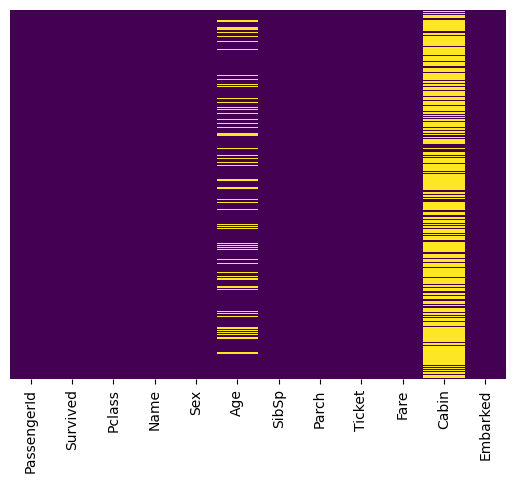

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

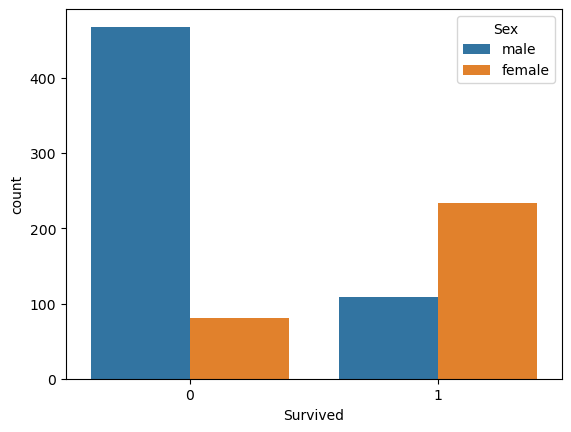

In [7]:
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

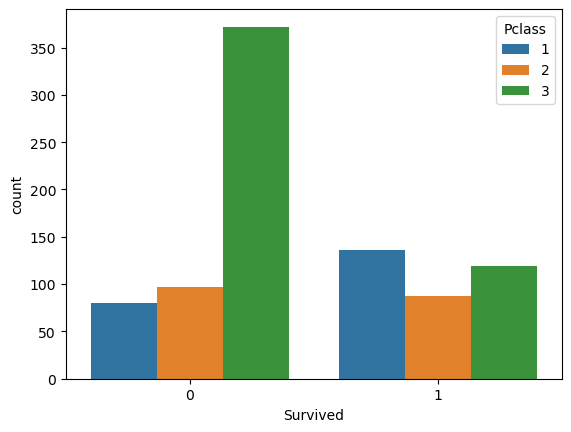

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=df)

from above we can say that those passengers in Pclass 1 survived more


# univariate analysis on numerical columns

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

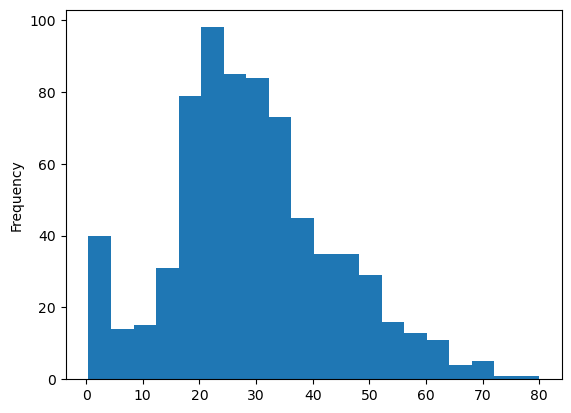

In [10]:
df['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

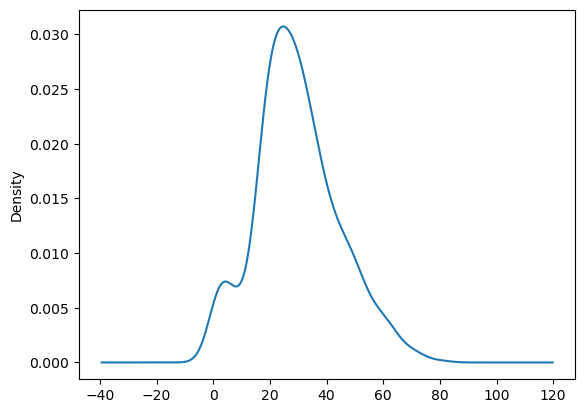

In [11]:
df['Age'].plot(kind='kde')

In [12]:
df['Age'].skew()

0.38910778230082704

<Axes: >

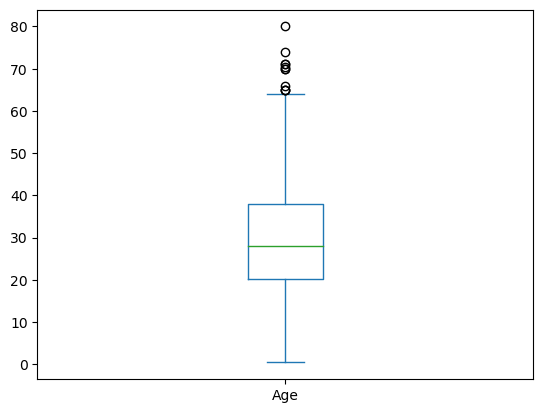

In [13]:
df['Age'].plot(kind='box')

In [14]:
df['Age'].isnull().sum()/len(df['Age'])

0.19865319865319866

conclusions:
the data is almost normally distributed
almost 20% of data are missing
there are some outliers present in the data


In [15]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

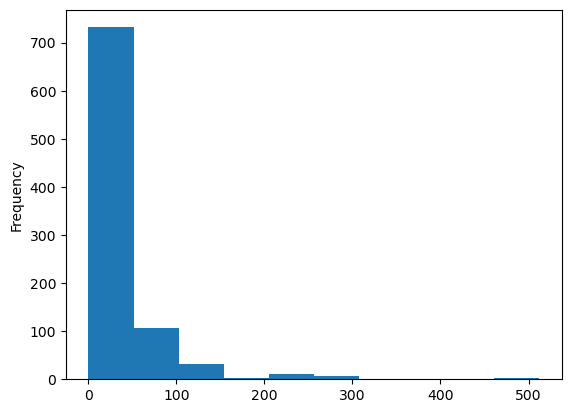

In [16]:
df['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

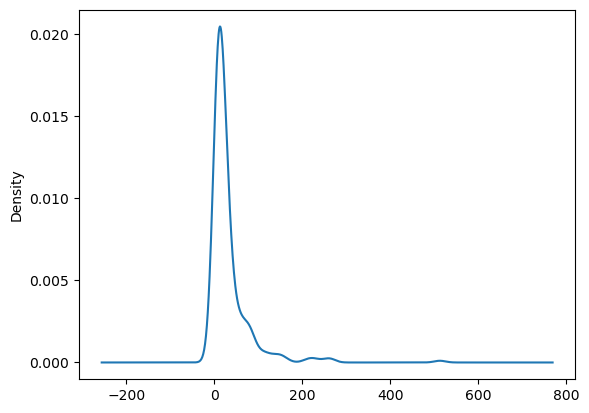

In [17]:
df['Fare'].plot(kind='kde')

<Axes: >

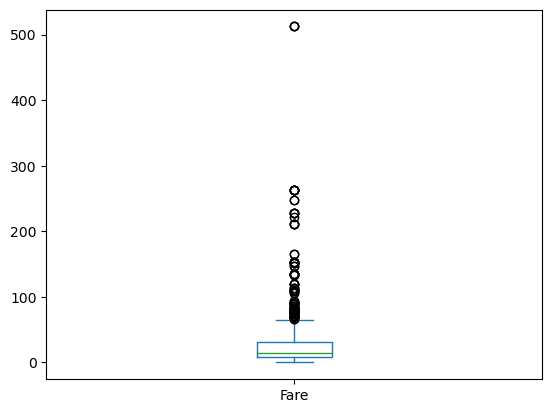

In [18]:
df['Fare'].plot(kind='box')

In [19]:
df['Fare'].skew()

4.787316519674893

In [20]:
df[df['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


conclusions:
>the data is highly postively skewed
>the fare column contains the group fare and also individual fare
>we need to create a column for individual fare

#univariate analysis on categorical columns 

In [21]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

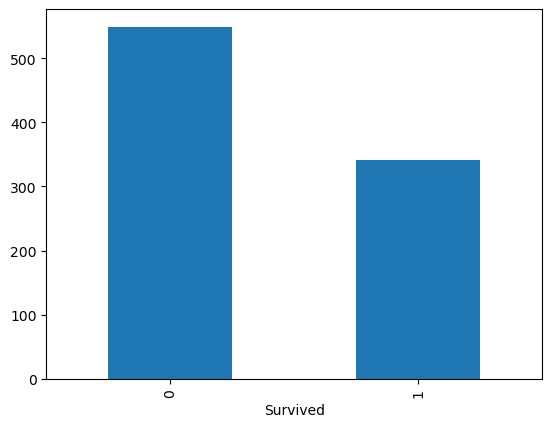

In [22]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

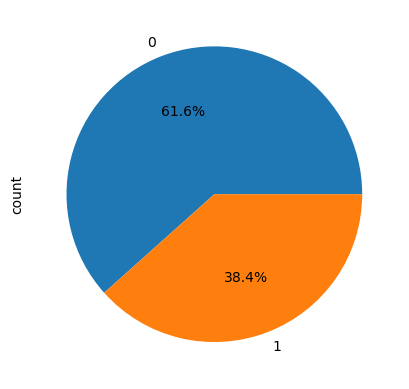

In [23]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [24]:
df['Survived'].isnull().sum()

0

conclusion:
    from the analysis we can say that about 62% of people did not survived

In [25]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

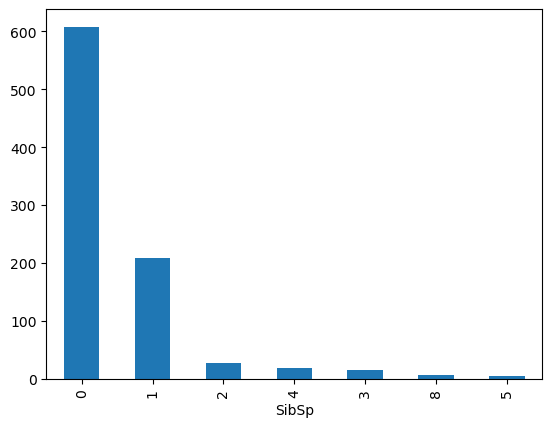

In [26]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

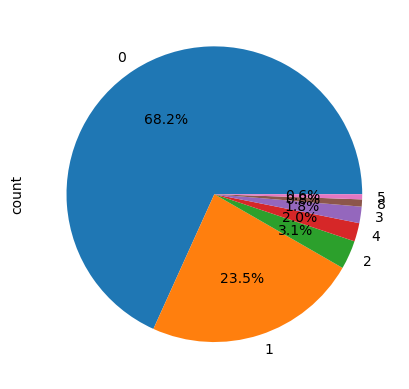

In [27]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [28]:
df['SibSp'].isnull().sum()

0

In [29]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

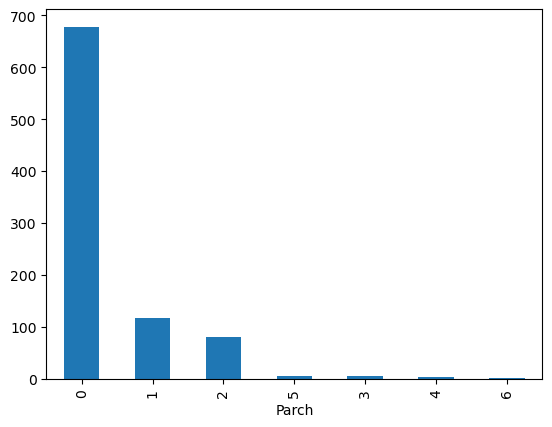

In [30]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

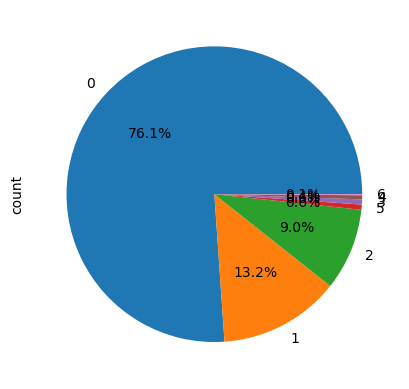

In [31]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [32]:
df['Parch'].isnull().sum()

0

In [33]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

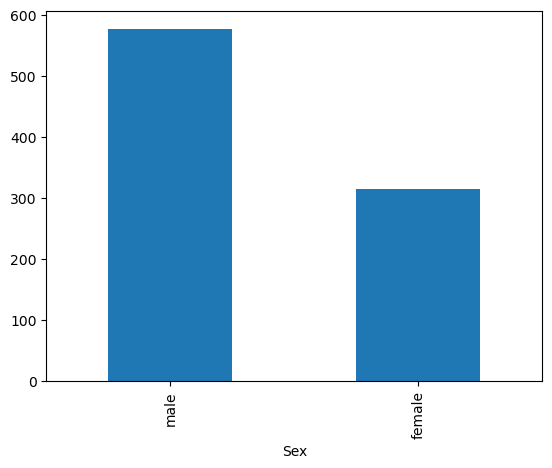

In [34]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

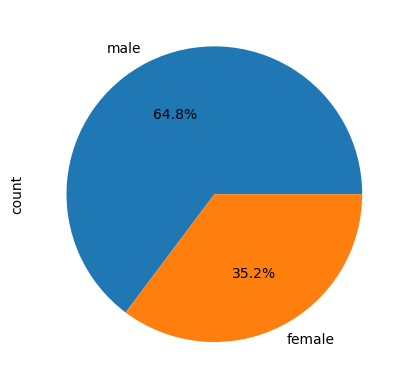

In [35]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [36]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

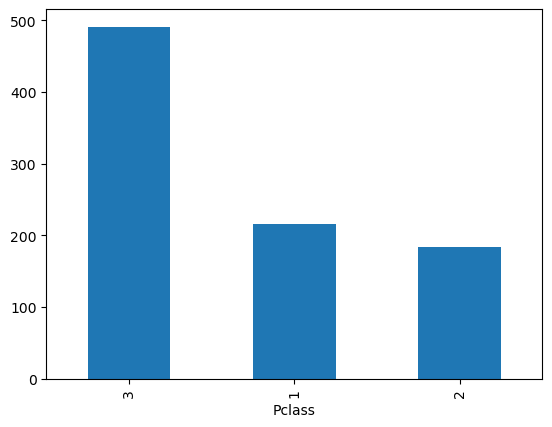

In [37]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

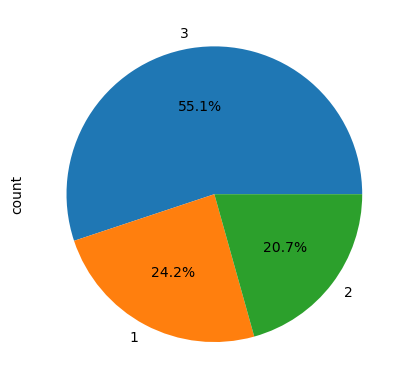

In [38]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

conclusions:
    The no of male passenger is more than female passenger
    we can merge the two columns Parch and SibSp into one
    we can also create a new column for travellers who are travelling alone

# bivariate anlaysis


# Categorical-categorical

In [39]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

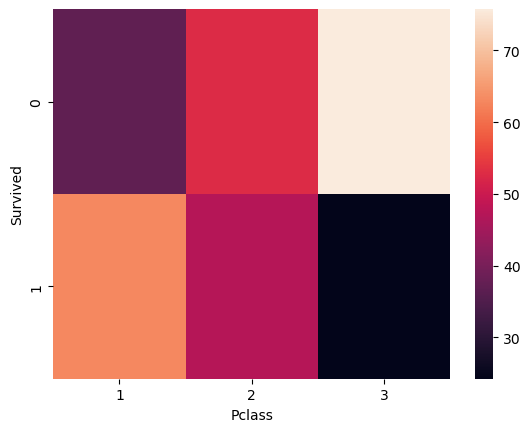

In [40]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

conclusion:
passengers travelling in pclass 3 is least survived

In [41]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

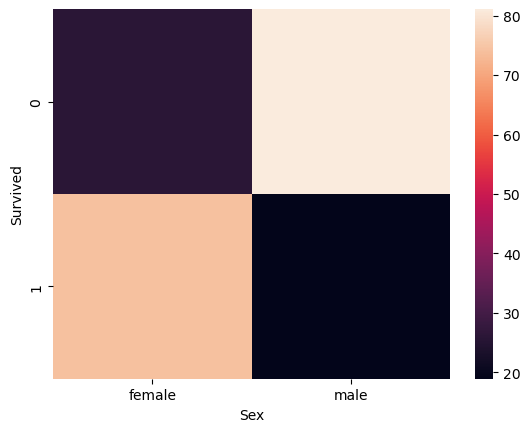

In [42]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100)

from above analysis we can say that female survived more than male

In [52]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [53]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


From the above conclusion we cansay that those who embarked are in 'c' and in Pclass1

# Numereical-Numerical


<Axes: xlabel='Age', ylabel='Fare'>

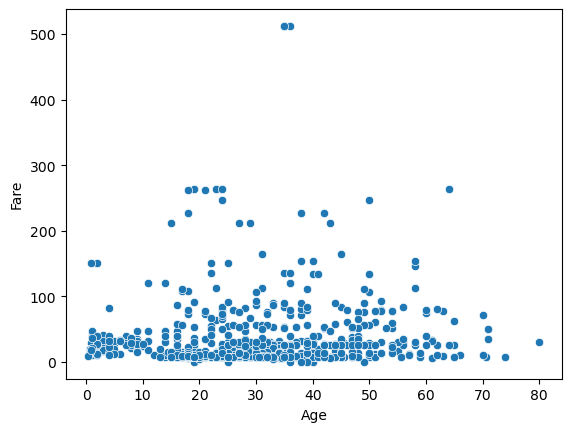

In [52]:
sns.scatterplot(x='Age',y='Fare',data=df)

# Numercal-Categorical

<Axes: xlabel='Survived', ylabel='Age'>

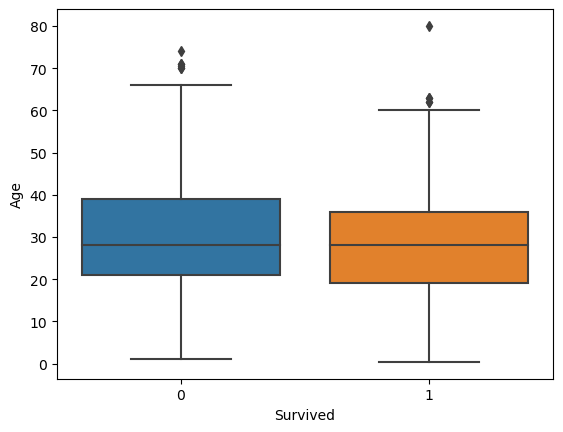

In [53]:
sns.boxplot(x='Survived',y='Age',data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

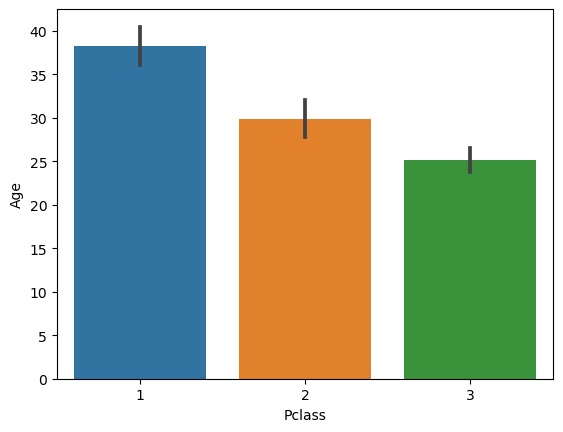

In [55]:
sns.barplot(x='Pclass',y='Age',data=df)

Multivariatew analysis

<Axes: xlabel='Age', ylabel='Fare'>

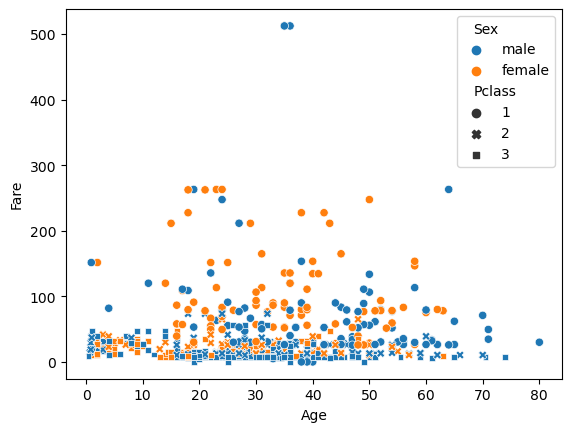

In [49]:
sns.scatterplot(x='Age',y='Fare',hue='Sex',style='Pclass',data=df)

<Axes: xlabel='Survived', ylabel='Age'>

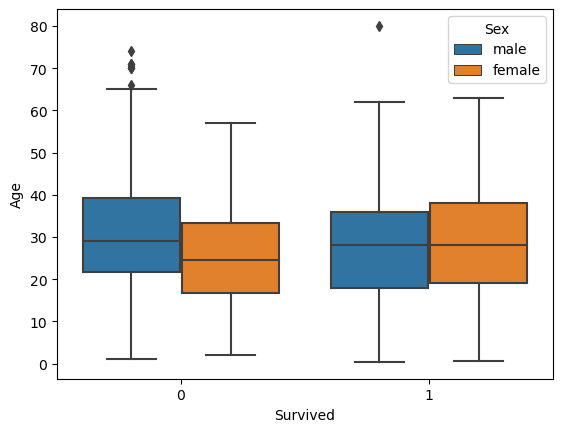

In [54]:
sns.boxplot(x='Survived',y='Age',hue='Sex',data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

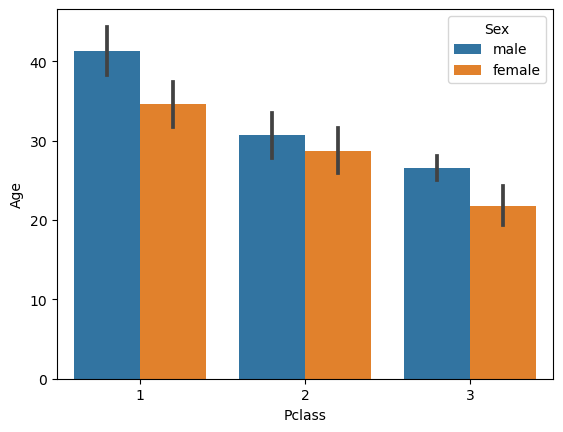

In [56]:
sns.barplot(x='Pclass',y='Age',hue='Sex',data=df)